In [6]:
#Question 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier


In [7]:

# XOR gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Single Layer Perceptron
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activate(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        linear_output = np.dot(inputs, self.weights) + self.bias
        return self.activate(linear_output)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error


In [8]:

# Train Single Layer Perceptron
slp = SingleLayerPerceptron(input_size=2)
slp.train(X, y)

# Test Single Layer Perceptron
print("Single Layer Perceptron predictions:")
for inputs in X:
    print(f"Input: {inputs}, Prediction: {slp.predict(inputs)}")

# Multi-Layer Perceptron using sklearn
mlp = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000)
mlp.fit(X, y)

# Test Multi-Layer Perceptron
print("\nMulti-Layer Perceptron predictions:")
predictions = mlp.predict(X)
for inputs, pred in zip(X, predictions):
    print(f"Input: {inputs}, Prediction: {pred}")


Single Layer Perceptron predictions:
Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 0

Multi-Layer Perceptron predictions:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Single Layer Perceptron (SLP) performance:

# The SLP has divided the input space into two regions with a linear boundary.
# It classifies inputs with a 0 in the first position as 1, and inputs with a 1 in the first position as 0.
# This suggests the SLP has learned to make decisions based primarily on the first input feature.


# Multi-Layer Perceptron (MLP) performance:

# The MLP's predictions match the XOR (exclusive OR) logic gate.
# It correctly identifies when the inputs are different (0,1 or 1,0) as 1, and when they're the same (0,0 or 1,1) as 0.


# Comparison:

# The SLP has learned a linear decision boundary, which is insufficient for solving the XOR problem.
# The MLP has successfully learned the non-linear decision boundary required for the XOR problem.

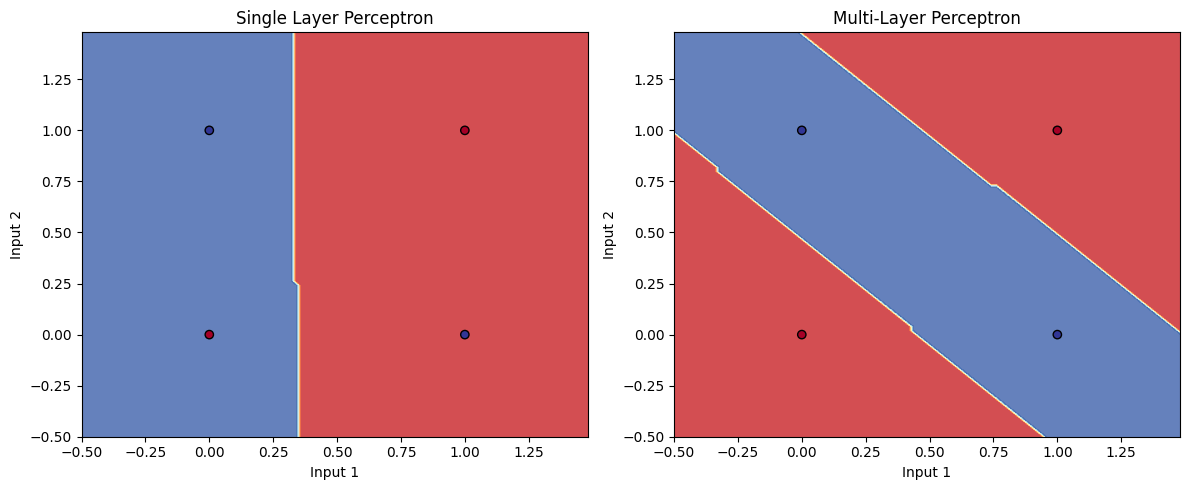

In [11]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    if isinstance(model, SingleLayerPerceptron):
        Z = np.array([model.predict(np.array([x,y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
    else:  # For sklearn's MLPClassifier
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')


#     Plot the decision boundary for a given model.

#     Parameters:
#     - model: The trained model (SingleLayerPerceptron or MLPClassifier)
#     - X: Input features (2D numpy array)
#     - y: Target labels

#     This function creates a contour plot showing the decision boundary of the model,
#     along with scattered data points colored according to their true labels.

plt.figure(figsize=(12, 5))

plt.subplot(121)
plot_decision_boundary(slp, X, y)
plt.title('Single Layer Perceptron')

plt.subplot(122)
plot_decision_boundary(mlp, X, y)
plt.title('Multi-Layer Perceptron')

plt.tight_layout()
plt.show()

In [ ]:
# The function first determines the plot limits based on the input data.
# It creates a meshgrid of points covering the entire plot area.
# For each point in the meshgrid, it predicts the class using the provided model.
# It then plots the decision boundary using contourf and scatters the original data points.

# Interpretation of the visualizations:

# Single Layer Perceptron (SLP):

# The decision boundary is a straight line, dividing the space into two regions.
# This shows that the SLP can only learn linearly separable patterns.
# In this case, it fails to correctly classify all points, as evidenced by the red point in the blue region and the blue point in the red region.


# Multi-Layer Perceptron (MLP):

# The decision boundary is non-linear, showing a more complex separation of the space.
# This demonstrates the MLP's ability to learn non-linear patterns.
# The boundary appears to correctly classify all points, with blue points in the blue region and red points in the red region.



# Key observations:

# The SLP's limitation to linear boundaries is clear, while the MLP can adapt to more complex data distributions.
# This visualization effectively demonstrates the increased capability of multi-layer neural networks compared to single-layer ones.

In [ ]:
#question 2


# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                                   review sentiment
count                                               50000     50000
unique                                              49581         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                   

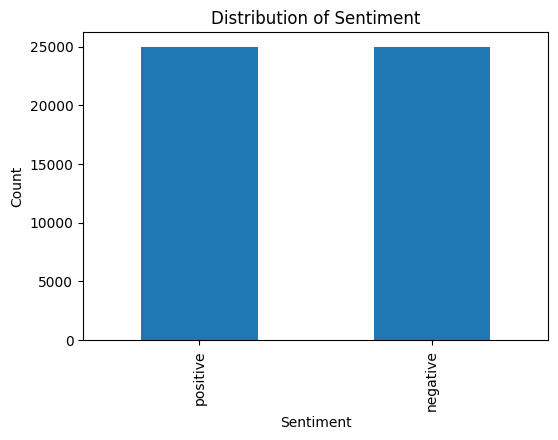

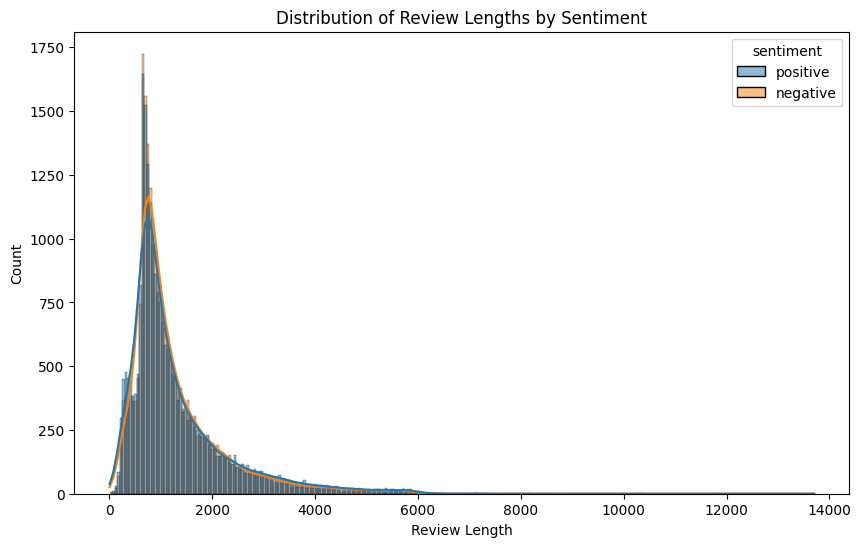

In [14]:

# Load the dataset
df = pd.read_csv('sample_data/IMDB.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())


# 1. Basic statistics
print(df.describe())

# 2. Sentiment distribution
plt.figure(figsize=(6, 4))
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 3. Review length analysis
df['review_length'] = df['review'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', kde=True)
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()


# Preprocess the data
# Convert sentiment to numerical values
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])


In [ ]:
#plot 1
# Balance: The dataset appears to be perfectly balanced between positive and negative sentiments. Both categories have approximately 25,000 reviews each.
# Sample size: The total dataset contains around 50,000 reviews (25,000 positive + 25,000 negative).

#PLOT 2
# Overall distribution:

# The review lengths follow a right-skewed distribution for both sentiments.
# Most reviews are concentrated in the shorter length ranges, with a long tail extending to very long reviews.


# Sentiment comparison:

# The distributions for positive and negative sentiments are very similar.
# There doesn't appear to be a significant difference in review length between positive and negative reviews.


# Review length characteristics:

# The peak of the distribution is around 500-1000 characters.
# Very few reviews exceed 6000 characters in length.
# There's a notable number of very short reviews (less than 500 characters).

In [ ]:
# 1. Preprocessing Steps (DOCUMENTATION)
#  Data Loading and Exploration

# The IMDb dataset is loaded.
# Basic exploratory data analysis (EDA) is performed:

# Displaying the first few rows of the dataset
# Checking the dataset information (column names, data types, non-null counts)

#Plotting Relevent plots as discussed above

# Text and Label Preprocessing
# Sentiment labels are converted from categorical (positive/negative) to numerical (1/0) using LabelEncoder.


In [4]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Tokenize and pad the sequences
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build the model
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 lstm_2 (LSTM)               (None, 200, 64)           49408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1344001 (5.13 MB)
Trainable params: 1344

In [ ]:
# The dataset is split into training and testing sets (80% train, 20% test).

# A vocabulary of the most frequent 10,000 words is created.
# Each word is assigned a unique integer index.

# Sequences are padded to ensure uniform length (200 words) for all reviews:

# Shorter sequences are padded with zeros.
# Longer sequences are truncated.


# 2. Model Architecture
# The model uses a combination of Embedding, LSTM, and Dense layers:

# Embedding Layer:

# Input dimension: 10,000 (vocabulary size)
# Output dimension: 128 (embedding vector size)
# Input length: 200 (maximum sequence length)


# LSTM Layers:

# First LSTM layer: 64 units, returns sequences
# Second LSTM layer: 32 units


# Dense Layers:

# Hidden Dense layer: 64 units with ReLU activation
# Dropout layer (50% dropout rate) for regularization
# Output Dense layer: 1 unit with sigmoid activation



313/313 [==============================] - 14s 42ms/step - loss: 0.2842 - accuracy: 0.8810
Test Loss: 0.2842
Test Accuracy: 0.8810


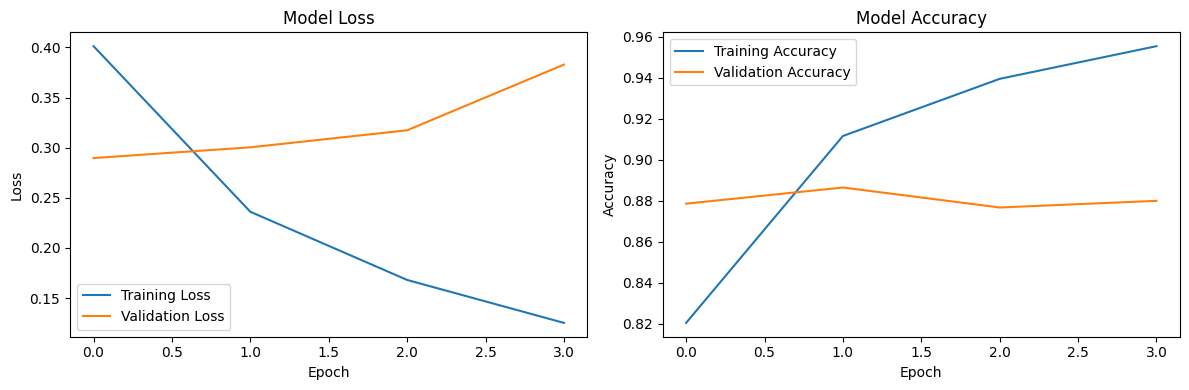

Sample review: This movie was fantastic! The acting was superb and the plot kept me engaged throughout.
1/1 [==============================] - 1s 678ms/step
Predicted sentiment: Positive


In [5]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Function to predict sentiment
def predict_sentiment(review):
    sequence = tokenizer.texts_to_sequences([review])
    padded = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded)[0][0]
    return "Positive" if prediction > 0.5 else "Negative"

# Test the model with a sample review
sample_review = "This movie was fantastic! The acting was superb and the plot kept me engaged throughout."
print(f"Sample review: {sample_review}")
print(f"Predicted sentiment: {predict_sentiment(sample_review)}")

In [ ]:

# Performance Evaluation:

# Accuracy:
# The model achieves an accuracy of 88.10% on the test set, which is generally considered good.
# This means the model correctly classifies about 88 out of 100 samples in the test set.

# Loss:
# The test loss of 0.2842 is relatively low, indicating that the model's predictions are fairly confident and align well with the true labels.
# Lower loss values generally indicate better model performance.


# Interpretation:

# The model performs well, with a high accuracy and low loss on unseen data.
# It suggests that the model has learned meaningful patterns from the training data that generalize to new examples.

# Additionally, training and validation curves for both loss and accuracy are plotted to visualize the model's performance over time.



In [ ]:

# 5. Justification for Activation Functions
# ReLU (Rectified Linear Unit)
# ReLU is used in the hidden Dense layer for the following reasons:

# Non-linearity: ReLU introduces non-linearity into the model, allowing it to learn complex patterns.
# Sparsity: ReLU can output true zero values, leading to sparse activations, which can be computationally efficient.
# Reduced Vanishing Gradient Problem: Unlike sigmoid or tanh, ReLU doesn't squash input in the positive region, helping to mitigate the vanishing gradient problem.
# Computational Efficiency: ReLU is simple to compute, making it faster than other activation functions like sigmoid or tanh.

# Sigmoid
# Sigmoid is used in the output layer for the following reasons:

# Binary Classification: Sigmoid squashes the output between 0 and 1, which is ideal for binary classification tasks like sentiment analysis (positive/negative).
# Probability Interpretation: The output can be interpreted as the probability of the positive class, which is intuitive for sentiment analysis.
# Smooth Gradient: Sigmoid has a smooth gradient, which is beneficial for training stability.

# 6. Suitability of Binary Cross-Entropy Loss
# Binary cross-entropy is an appropriate loss function for this sentiment analysis task for several reasons:

# Binary Classification: It's specifically designed for binary classification problems, which aligns with our task of classifying sentiments as positive or negative.
# Probability Output: It works well with models that output probabilities (which our sigmoid activation produces), measuring the performance of a classification model whose output is a probability value between 0 and 1.
# Penalizes Confident Mistakes: Binary cross-entropy heavily penalizes predictions that are both confident and wrong. For instance, if the model predicts a probability of 0.9 for a negative review (actually 0), it will incur a higher loss than if it had predicted 0.6.
# Mathematically Appropriate: For a binary classification problem, minimizing the binary cross-entropy is equivalent to maximizing the likelihood of the observed data under the model parameters.
# Gradient Properties: It provides a smoother gradient and typically faster convergence compared to other loss functions like mean squared error when used for classification tasks.

# By using binary cross-entropy, we ensure that our model is optimized specifically for the binary nature of sentiment classification, encouraging it to make confident predictions when appropriate while penalizing overconfidence in incorrect classifications.